# Real or Not? NLP with Disaster Tweets

### 과연 Tweet의 게시물들이 정말로 disaster를 나타낸건지 아닌지 구별하는 것!

In [3]:
import pandas as pd
import numpy as np
import os
#os.chdir(r'../')
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re
import string
import nltk
from nltk.corpus import stopwords

# Data Load

In [4]:
for dirname, _, filenames in os.walk('./nlp-getting-started'):
    for filename in filenames :
        print(os.path.join(dirname, filename))

./nlp-getting-started\sample_submission.csv
./nlp-getting-started\test.csv
./nlp-getting-started\train.csv


참고] 이렇게도 했었음.

In [9]:
for (path, dir, files )in os.walk('./nlp-getting-started'):
    for filename in files :
        ext = os.path.splitext(filename)[-1]
        if ext == '.csv':
            print("%s/%s" % (path, filename))

./nlp-getting-started/sample_submission.csv
./nlp-getting-started/test.csv
./nlp-getting-started/train.csv


In [5]:
train = pd.read_csv("./nlp-getting-started/train.csv")
test = pd.read_csv("./nlp-getting-started/test.csv")
sub_sample = pd.read_csv("./nlp-getting-started/sample_submission.csv")

print(train.shape, test.shape, sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


In [4]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Exploring the Target Column

In [4]:
train.duplicated().sum()
train = train.drop_duplicates().reset_index(drop=True)

There are 0 duplicated rows.

### Class Balance

Visulaization 1)

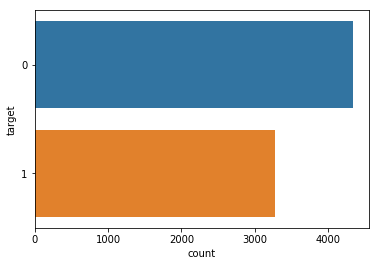

In [15]:
# Class Balance
train['target'].value_counts(normalize=True)
sns.countplot(y=train.target);

Visualization 2)

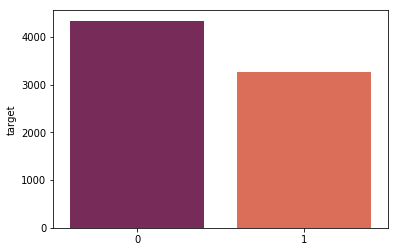

In [12]:
sns.barplot(train['target'].value_counts().index, train['target'].value_counts(), palette='rocket')

In [11]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [17]:
train.groupby('keyword').count()

,id,location,text,target
keyword,,,,
ablaze,36,29,36,36
accident,35,28,35,35
aftershock,34,25,34,34
airplane%20accident,35,29,35,35
ambulance,38,26,38,38
annihilated,34,20,34,34
annihilation,29,18,29,29
apocalypse,32,17,32,32
armageddon,42,32,42,42


In [13]:
train.groupby('location').count()

,id,keyword,text,target
location,,,,
,1,1,1,1
Glasgow,1,1,1,1
"Melbourne, Australia",1,1,1,1
News,1,1,1,1
å_,1,1,1,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1,1,1,1
"616 Û¢ Kentwood , MI",1,1,1,1
? ??????? ? ( ?? å¡ ? ? ? å¡),1,1,1,1
?currently writing a book?,1,1,1,1


In [23]:
#NA data
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [47]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Keywords

In [22]:
#Check number of unique keywords, and whether they are the same for train and test sets
print(train.keyword.nunique(), test.keyword.nunique())

221 221


결측치를 제외하고 keyword 변수는 총 221개의 label이 존재함.

In [6]:
train.keyword.value_counts().iloc[:15].index

Index(['fatalities', 'deluge', 'armageddon', 'body%20bags', 'harm', 'damage',
       'sinking', 'windstorm', 'siren', 'fear', 'twister', 'evacuate',
       'collided', 'outbreak', 'famine'],
      dtype='object')

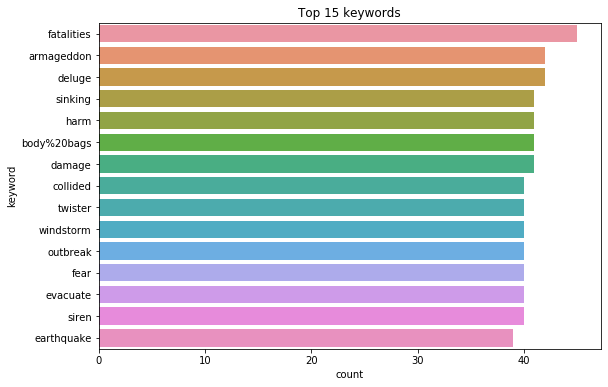

In [69]:
# Most common Keywords
plt.figure(figsize = (9,6))
sns.countplot(y=train.keyword, order=train.keyword.value_counts().iloc[:15].index)
plt.title("Top 15 keywords")
plt.show()

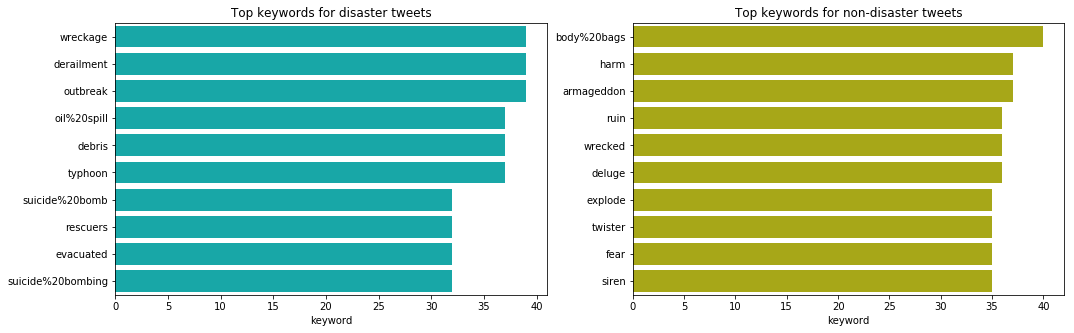

In [7]:
kw_d = train[train.target==1].keyword.value_counts().head(10)
kw_nd = train[train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(17,5))
plt.subplot(121)
sns.barplot(kw_d, kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(kw_nd, kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.show()

There is no common top 10 keywords between disaster and non-disaster tweets.

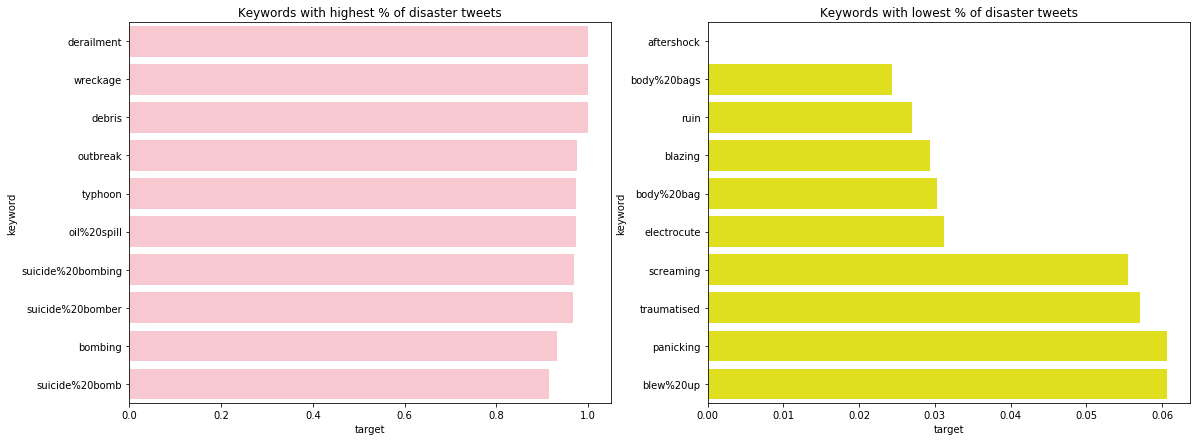

In [99]:
top_d = train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = train.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(19,7))
plt.subplot(121)
sns.barplot(top_d, top_d.index, color='pink')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(top_nd, top_nd.index, color='yellow')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

# Location

In [23]:
print(train.location.nunique(), test.location.nunique())

3341 1602


In [9]:
train.location.value_counts().iloc[:15].index

Index(['USA', 'New York', 'United States', 'London', 'Canada', 'Nigeria', 'UK',
       'Los Angeles, CA', 'India', 'Mumbai', 'Washington, DC', 'Kenya',
       'Worldwide', 'Australia', 'Chicago, IL'],
      dtype='object')

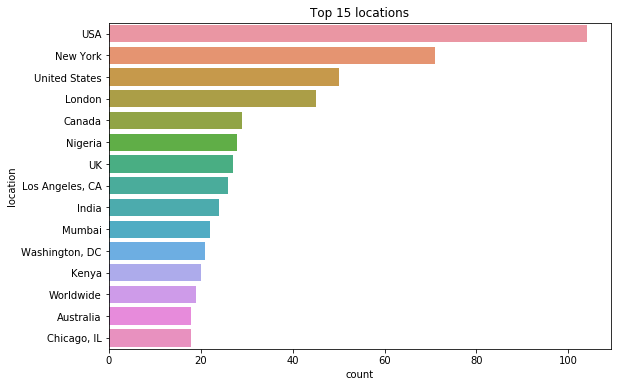

In [25]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train.location, order=train.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

the data is not clean, see both 'USA' and 'United States' in top locations.

In [43]:
train.location.value_counts()

USA                                       104
New York                                   71
United States                              50
London                                     45
Canada                                     29
Nigeria                                    28
UK                                         27
Los Angeles, CA                            26
India                                      24
Mumbai                                     22
Washington, DC                             21
Kenya                                      20
Worldwide                                  19
Australia                                  18
Chicago, IL                                18
California                                 17
New York, NY                               15
Everywhere                                 15
California, USA                            15
San Francisco                              14
Florida                                    14
United Kingdom                    

In [44]:
train[train.location.isin(top_loc)]

,id,keyword,location,text,target
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1
66,95,ablaze,San Francisco,@ablaze what time does your talk go until? I d...,0
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0
73,105,accident,Australia,BigRigRadio Live Accident Awareness,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,1
124,178,aftershock,United States,&gt;&gt; $15 Aftershock : Protect Yourself and...,0
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,1
158,226,airplane%20accident,Canada,DTN Brazil: Experts in France begin examining ...,1


look at % of disaster tweets for common locations

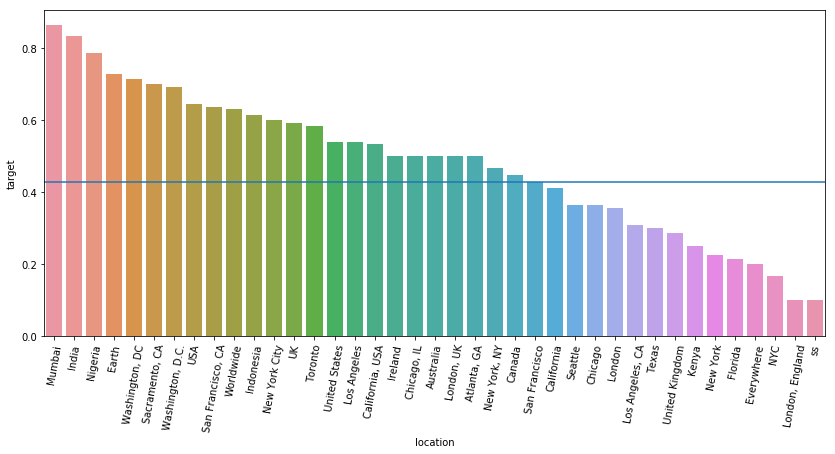

In [32]:
# location의 label 갯수를 큰 값부터 나열
raw_loc = train.location.value_counts()
# list로 만든다.
top_loc = list(raw_loc[raw_loc>=10].index)
# isin 구문은 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰인다. 
top_only = train[train.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
# target의 평균값을 수평선으로 추가 
plt.axhline(np.mean(train.target))
# xticks : x축에 있는 label의 글씨를 rotation(각)을 통해 어떻게 표시할 지 
plt.xticks(rotation=80)
plt.show()

The top 3 locations with highest % of disaster tweets are Mumbai, Inida, and Nigeria.  
As the location data is not clean, we see some interesting cases,   
such as 'London, UK' saw a higher-than-average % of disaster tweets, but 'London' is below average.  
  
We try to clean up the location and see if there is any difference:

# Text Data Pre-Processing

## Cleaning the Data

- Making a 'clean' text column, removing links and unnecessary white spaces
- Creating separate columns containing lists of hashtags, mentions, and links

##### Data Cleaning  

- Removing Noise
- Tokenization
- Stopword Removal  

More data cleaning steps after tokenizations:  

- Stemming  

- Lemmatization   

In [10]:
# Replacing the ambigious locations name with Standard names
train['location'].replace({'Mumbai' : 'India',
                           'Washington' : 'USA',
                           'Sacramento' : 'USA',
                           'Washington, D.C' : 'USA',
                           'San Francisco, CA' : 'USA',
                           'New York City' : 'USA',
                           'New York' : 'USA',
                           'NYC' : 'USA',
                           'United States' : 'USA',
                           'Los Angeles' : 'USA',
                           'Los Angeles, CA' : 'USA',
                           'California, USA' : 'USA',
                           'Atlanta, GA' : 'USA',
                           'New York, NY' : 'USA',
                           'Sanfrancisco' : 'USA',
                           'California' : 'USA',
                           'Seattle' : 'USA', 
                           'Texas' : 'USA',
                           'Florida' : 'USA',
                           'Chicago' : 'USA',
                           'Toronto' : 'Canada',
                           'United Kingdom' : 'UK',
                           'London' : 'UK',
                           'London, England' : 'UK',
                           'Earth' : 'World',
                           'Worldwide' : 'World',
                           'Everywhere' : 'World'}, inplace=True)

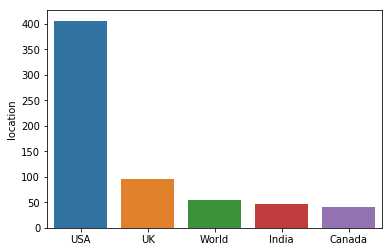

In [12]:
sns.barplot(train['location'].value_counts()[:5].index, train['location'].value_counts()[:5])

## 1. Data Cleaning  
Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.  
We need to clean, tokenize and convert our data into a matrix.  
Some of the basic text pre-processing techniques includes:  

- Make text all **lower case** or **upper case** so that the algorithm does not treat the same words in different cases as different  
- **Removing Noise** i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values, common non-sensical text (/n)  
- **Tokenization** : Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens   i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
- **Stopword Removal**: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching  a user need are excluded from the vocabulary entirely. These words are called stop words

### More data cleaning steps after tokenization:

- **Stemming**: Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root  
form — generally a written word form. Example if we were to stem the following words:  
"Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.  
- **Lemmatization**: A slight variant of stemming is lemmatization. The major difference between these is, that,  
<U>stemming can often create non-existent words, whereas lemmas are actual words.</U> So, your root stem,  
meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.  
Examples of Lemmatization are that “run” is a base form for words like “running” or “ran"  
or that the word “better” and “good” are in the same lemma so they are considered the same.  
- **Parts of speech tagging**  
- **Create bi-grams or tri-grams And more...**  

In [6]:
# Applying a first round of text cleaning techniques

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    # lower case
    text = text.lower()
    
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\n', '', text)
    
    text = re.sub('\w*\d\w*', '', text)
    return text

In [7]:
# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [17]:
!pip install wordcloud

## 2. Tokenization

In [20]:
text = "Are you coming , aren't you"

# Whitespace Tokenizer: 공백 문자로 텍스트를 분할
# Treebank Tokenizer은 두 가지의 규칙이 있다.  
    # 1. -으로 연결된 단어는 하나로 유지한다.  
    # 2. doesn't와 같이 '로 '접어'가 함께하믄 단어는 분리해준다.  
# WordPunctTokenizer는 '(구두점)을 별도로 분류하는 특징을 갖고 있다.
# 예를 들자면, Don't를 Don과 '와 t로 분리한다. 
# RegexpTokenizer : 정규 표현식을 사용해서 단어 토큰화를 수행한다. 
# RegexpTokenizer()에서 괄호 안에 원하는 정규 표현식을 넣어서 토큰화를 수행한다.
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text: ",text)
print("------------------------------------------------------------------------------------------------")
print("Tokenization by whitespace: ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer: ",tokenizer2.tokenize(text))
print("Tokenization by punctuation: ",tokenizer3.tokenize(text))
print("Tokenization by regular expression: ",tokenizer4.tokenize(text))

Example Text:  Are you coming , aren't you
------------------------------------------------------------------------------------------------
Tokenization by whitespace:-  ['Are', 'you', 'coming', ',', "aren't", 'you']
Tokenization by words using Treebank Word Tokenizer:-  ['Are', 'you', 'coming', ',', 'are', "n't", 'you']
Tokenization by punctuation:-  ['Are', 'you', 'coming', ',', 'aren', "'", 't', 'you']
Tokenization by regular expression:-  ['Are', 'you', 'coming', 'aren', 't', 'you']


In [8]:
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

## 3. Stopwords Removal

In [9]:
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words


train['text'] = train['text'].apply(lambda x : remove_stopwords(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


## 4. Token Normalization

Token Normalization means converting different tokens to their base forms. This can be done either by:

- **Stemming** : removing and replacing suffixes to get to the root form of the word, which is called the stem for instance cats  
    ex. cat, wolves - wolv
- **Lemmatization** : Returns the base or dictionary form of a word, which is known as the lemma

In [23]:
# Stemming and Lemmatization examples
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the sentence:  feet cat wolv talk
Lemmatizing the sentence:  foot cat wolf talked


It is important to note here that stemming and lemmatization sometimes donot necessarily improve results as at times  
we do not want to trim words but rather preserve their original form. Hence their usage actually differs from problem to problem.  
For this problem, I will not use these techniques.

In [10]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    # list of text를 1번의 space로 구분된 문자열로 바꿈.
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


#### Getting it all together - A Text Preprocessing Function
This concludes the pre-processing part.  
It will be prudent to convert all the steps undertaken into a function for better reusability.

In [11]:
# text preprocessing function
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

# 5. Transforming tokens to a vector

After the initial preprocessing phase, we need to transform text into a meaningful vector (or array) of numbers.  
This can be done by a number of tecniques:

----------------------------
# 정리

sub 메서드의 첫 번째 매개변수는 "**바꿀 문자열(replacement)**"이 되고, 두 번째 매개변수는 "**대상 문자열**"이 된다.  
- 딱 한번만 바꾸고 싶은 경우, 세 번째 매개변수로 count 값을 넘기면 된다.
- Tip. sub 메서드의 매개변수로 함수를 넣을 수 있다.

### re.escape(string)
re.escape 함수는 문자열을 입력받으면 특수문자들을 이스케이프 처리시켜 준다.

- **[문자들]** : 대괄호 안에 포함된 문자들 중에 하나와 매치를 뜻함. 가능한 문자들의 집합을 정의함.  
만약 []안의 두 문자에 - 를 사용하면 **두 문자 사이의 범위**를 뜻한다.
- **?**  : 앞 패턴이 없거나 하나이어야 함.
- **\s** : 화이트 스페이스를 의미함. 공백[\t\n\r\f]과 동일하다.
- **\w** : 문자 또는 숫자를 의미함. [a-zA-Z0-9]와 의미가 동일하다.
- **\S** : 비공백[^\t\n\r\f]와 동일하다.
- **\D** : 비숫자 [^0-9]와 같다.
-  **.**  : 뉴라인(\n)을 제외한 모든 문자를 의미  
다만 [] 사이에서 .을 사용할 경우 문자 원래의 의미인 마침표가 된다.
- **^** : []안에서 ^는 **반대**를 뜻한다.  
-  '*'  :  * 앞에 오는 문자가 0개를 포함하여 몇 개가 오든 모두 매치된다.
- **+** : + 앞에 있는 문자가 최소 한 번 이상 반복되어야 매치된다.  
- **r** 문자는 raw string으로 백슬래시 문자를 해석하지 않고 남겨두기 때문에 정규표현식과 같은 곳에 유용하다.

# Reference

## <EDA, Visualization>  
- https://www.kaggle.com/aaroha33/disaster-tweets-evaluation-with-nlp
-------
- https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
- https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro  
- https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model  
- https://www.kaggle.com/sahib12/nlp-starter-for-beginners

### 정규표현식  
- https://greeksharifa.github.io/%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D(re)/2018/08/24/regex-usage-09-other-functions/
- https://nachwon.github.io/regular-expressions/
- https://wikidocs.net/21703
- https://developers.google.com/edu/python/regular-expressions
-------------------------------------------
실습
- https://regexr.com/

## 파이썬
- https://wayhome25.github.io/python/2017/02/26/py-14-list/

### Tokenizer
- https://tourspace.tistory.com/248

## 참고서적 
- https://wikidocs.net/21698